# Evaluate Fisher information

Johann Brehmer, Kyle Cranmer, Felix Kling, Duccio Pappadopulo, Josh Ruderman 2018

In [22]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
% matplotlib inline
import logging
import os

from madminer.ml import MLForge, EnsembleForge

logging.basicConfig(format='%(asctime)s  %(message)s', datefmt='%H:%M')

In [23]:
base_dir = '/Users/johannbrehmer/work/projects/madminer/diboson_mining/'
mg_dir = '/Users/johannbrehmer/work/projects/madminer/MG5_aMC_v2_6_2/'

In [24]:
sample_dir = base_dir + 'data/samples/wgamma/'
card_dir = base_dir + 'cards/wgamma/'
ufo_model_dir = card_dir + 'SMWgamma_UFO'
run_card_dir = card_dir + 'run_cards/'
mg_process_dir = base_dir + 'data/mg_processes/wgamma/'
log_dir = base_dir + 'logs/wgamma/'
temp_dir = base_dir + 'data/temp'
delphes_dir = mg_dir + 'Delphes'
model_dir = base_dir + 'data/models/wgamma/'
result_dir = base_dir + 'data/results/wgamma/'

## Load ML model

In [26]:
forge = MLForge()
forge.load(model_dir + 'sally_ensemble_minimal/estimator_1')

## Get data and gradients

In [27]:
x = np.load(sample_dir + 'test/x_test.npy')

In [28]:
t, grad = forge.evaluate(
    sample_dir + 'test/x_test.npy',
    return_grad_x=True
)

## Gradient distribution 

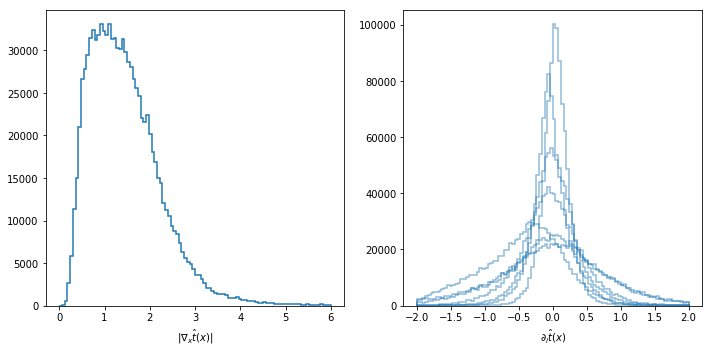

In [34]:
fig = plt.figure(figsize=(10,5))

ax = plt.subplot(1,2,1)
plt.hist(
    np.linalg.norm(grad, axis=1),
    bins=100,
    range=(0.,6.),
    histtype='step',
    lw=1.5,
)
plt.xlabel(r'$|\nabla_x \hat{t}(x)|$')

ax = plt.subplot(1,2,2)
for i in range(grad.shape[1]):
    plt.hist(
        grad[:,i],
        bins=100,
        range=(-2.,2.),
        histtype='step',
        lw=1.5,
        alpha=0.5,
        color='C0'
    )
plt.xlabel(r'$\partial_i \hat{t}(x)$')

plt.tight_layout()
plt.show()

In [35]:
grad.shape

(1000000, 7)

## Plot gradients vs x

In [30]:
def plot(i, j, skip=50):
    fig = plt.figure(figsize=(12,5))

    ax = plt.subplot(1,2,1)
    sc = plt.scatter(x[::skip,i], x[::skip,j], c=grad[::skip,i], cmap='PRGn', vmin=-2., vmax=2., s=20.)
    cbar = fig.colorbar(sc, ax=ax, extend='both')
    plt.xlabel('$x_{' + str(i) + '}$')
    plt.ylabel('$x_{' + str(j) + '}$')
    cbar.set_label(r'$\partial_{' + str(i) + '} \hat{t}(x)$')

    ax = plt.subplot(1,2,2)
    sc = plt.scatter(x[::skip,i], x[::skip,j], c=grad[::skip,j], cmap='PRGn', vmin=-2., vmax=2., s=20.)
    cbar = fig.colorbar(sc, ax=ax, extend='both')
    plt.xlabel('$x_{' + str(i) + '}$')
    plt.ylabel('$x_{' + str(j) + '}$')
    cbar.set_label(r'$\partial_{' + str(j) + '} \hat{t}(x)$')

    plt.tight_layout()
    plt.show()

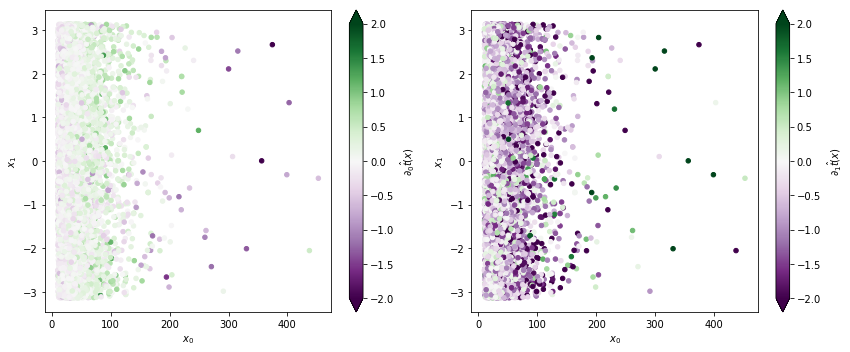

In [31]:
plot(0,1)

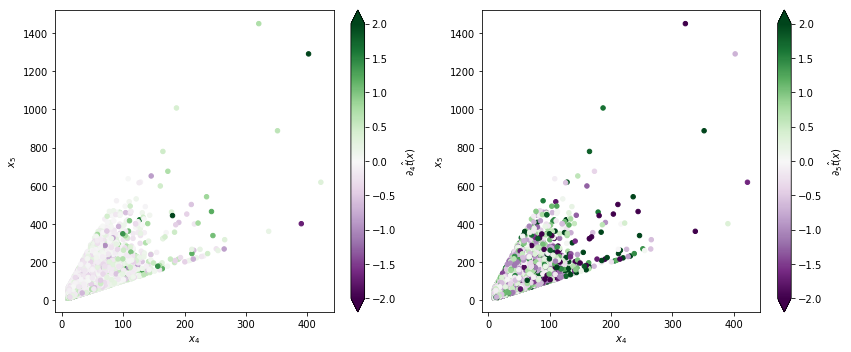

In [36]:
plot(4,5)